<a href="https://colab.research.google.com/github/shanon-g/asl/blob/main/ASL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. SHANON GIULY ISTANTO - 2702250116
2. TEUKU FAYAZ AHSAN - 2702366634
3. CUT NUR AZIZATI NASWANDI - 2702365184

# **Get ASL Dataset**

In [ ]:
!curl -L -o asl-dataset.zip https://www.kaggle.com/api/v1/datasets/download/prathumarikeri/american-sign-language-09az

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  992M  100  992M    0     0  83.6M      0  0:00:11  0:00:11 --:--:-- 85.3M


In [ ]:
import zipfile
import os

dataset_zip_path = "/content/asl-dataset.zip"
extract_path = "/content/asl_dataset"

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

asl_dataset_path = extract_path
asl_labels = sorted(os.listdir(asl_dataset_path))
print("Done Extracting")


Done Extracting


## Split to (Test, Train, Val)

In [ ]:
!pip install split-folders
import splitfolders

input = "/content/asl_dataset/American"
output = "/content/split/"

splitfolders.ratio(input, output=output,
    seed=1337, ratio=(.6, .2, .2), group_prefix=None, move=False)

Copying files: 142261 files [00:17, 8275.84 files/s]


In [ ]:
def count_images(directory):
    total_images = 0
    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        if os.path.isdir(class_path):
            total_images += len(os.listdir(class_path))
    return total_images


train_dir = '/content/split/train'
val_dir = '/content/split/val'
test_dir = '/content/split/test'


train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

print(f"Total images in Train set: {train_count}")
print(f"Total images in Validation set: {val_count}")
print(f"Total images in Test set: {test_count}")

Total images in Train set: 85348
Total images in Validation set: 28443
Total images in Test set: 28470


In [ ]:
import os

train_dir = "/content/split/train"
labels = sorted(os.listdir(train_dir))
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


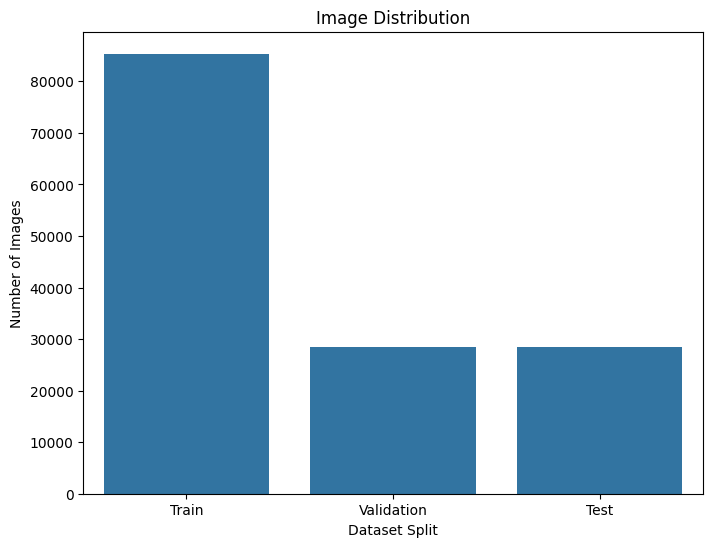

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['Train', 'Validation', 'Test']
image_counts = [train_count, val_count, test_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=image_counts)
plt.title('Image Distribution')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')

plt.show()


## Augmentation



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
     rescale=1.0/255,
     rotation_range=15,
     width_shift_range=0.1,
     height_shift_range=0.1,
     shear_range=0.1,
     zoom_range=0.1,
     brightness_range=(0.8, 1.2),
     fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(64, 64),
     batch_size=32,
     class_mode='categorical',
     shuffle=True
 )

val_generator = val_test_datagen.flow_from_directory(
     val_dir,
     target_size=(64, 64),
     batch_size=32,
     class_mode='categorical'
 )

test_generator = val_test_datagen.flow_from_directory(
     test_dir,
     target_size=(64, 64),
     batch_size=32,
     class_mode='categorical',
     shuffle=False
 )


Found 85348 images belonging to 36 classes.
Found 28443 images belonging to 36 classes.
Found 28470 images belonging to 36 classes.


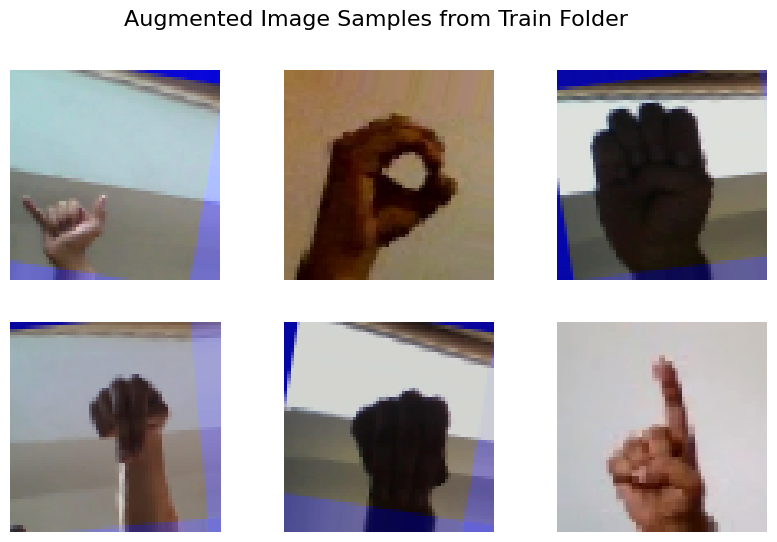

Updated Total images in Train set: 85348
Total images in Validation set: 28443
Total images in Test set: 28470


In [ ]:
augmented_images, _ = next(train_generator)


plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis("off")

plt.suptitle("Augmented Image Samples from Train Folder", fontsize=16)
plt.show()


train_count = count_images(train_dir)
val_count = count_images("/content/split/val")
test_count = count_images("/content/split/test")

print(f"Updated Total images in Train set: {train_count}")
print(f"Total images in Validation set: {val_count}")
print(f"Total images in Test set: {test_count}")

In [ ]:
labels = [None] * len(train_generator.class_indices)
for label, idx in train_generator.class_indices.items():
    labels[idx] = label

print("Labels order used during training:", labels)

Labels order used during training: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
def count_class_images(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_class_images(train_dir)
val_counts = count_class_images(val_dir)
test_counts = count_class_images(test_dir)

print("Training Set:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count}")

print("\nValidation Set:")
for class_name, count in val_counts.items():
    print(f"{class_name}: {count}")

print("\nTest Set:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count}")

Training Set:
h: 3642
q: 2154
m: 1754
s: 1424
r: 2122
p: 1539
e: 1842
6: 1842
3: 942
4: 1842
d: 3642
5: 1842
l: 3896
y: 1472
v: 2355
a: 3642
0: 1842
2: 942
1: 942
u: 1946
w: 1251
8: 1842
j: 3674
f: 3642
9: 1842
g: 3642
i: 4084
k: 3292
z: 1330
b: 3642
7: 1842
o: 4376
c: 3642
x: 1398
n: 2380
t: 1845

Validation Set:
h: 1214
q: 718
m: 584
s: 474
r: 707
p: 513
e: 614
6: 614
3: 314
4: 614
d: 1214
5: 614
l: 1298
y: 490
v: 785
a: 1214
0: 614
2: 314
1: 314
u: 648
w: 417
8: 614
j: 1224
f: 1214
9: 614
g: 1214
i: 1361
k: 1097
z: 443
b: 1214
7: 614
o: 1458
c: 1214
x: 466
n: 793
t: 615

Test Set:
h: 1214
q: 718
m: 586
s: 476
r: 709
p: 514
e: 614
6: 614
3: 314
4: 614
d: 1214
5: 614
l: 1300
y: 492
v: 786
a: 1214
0: 614
2: 314
1: 314
u: 650
w: 418
8: 614
j: 1226
f: 1214
9: 614
g: 1214
i: 1362
k: 1099
z: 445
b: 1214
7: 614
o: 1460
c: 1214
x: 466
n: 795
t: 616


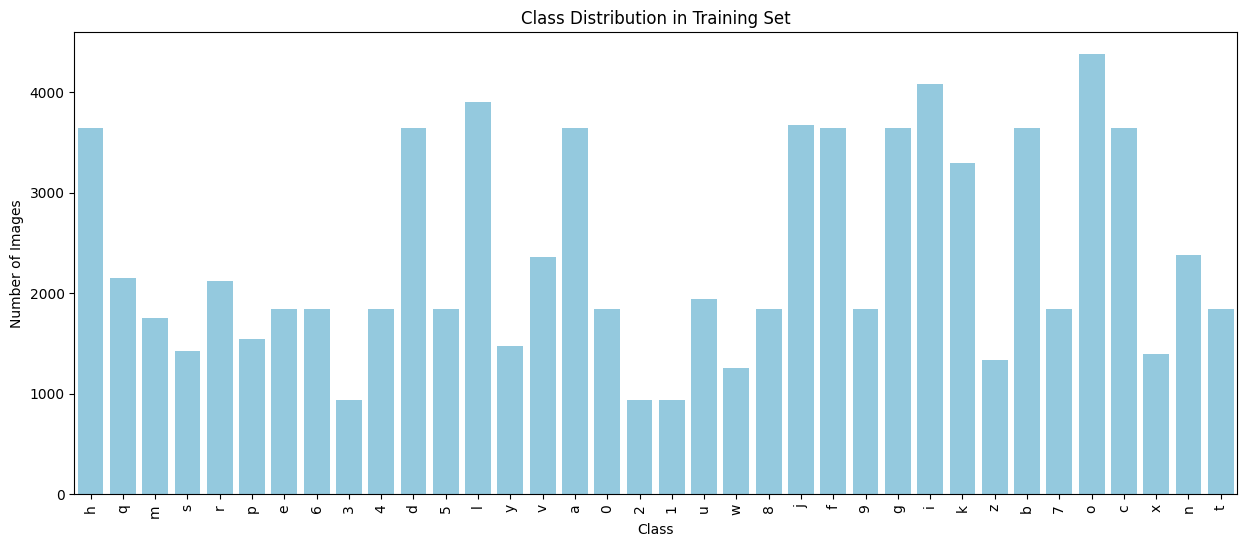

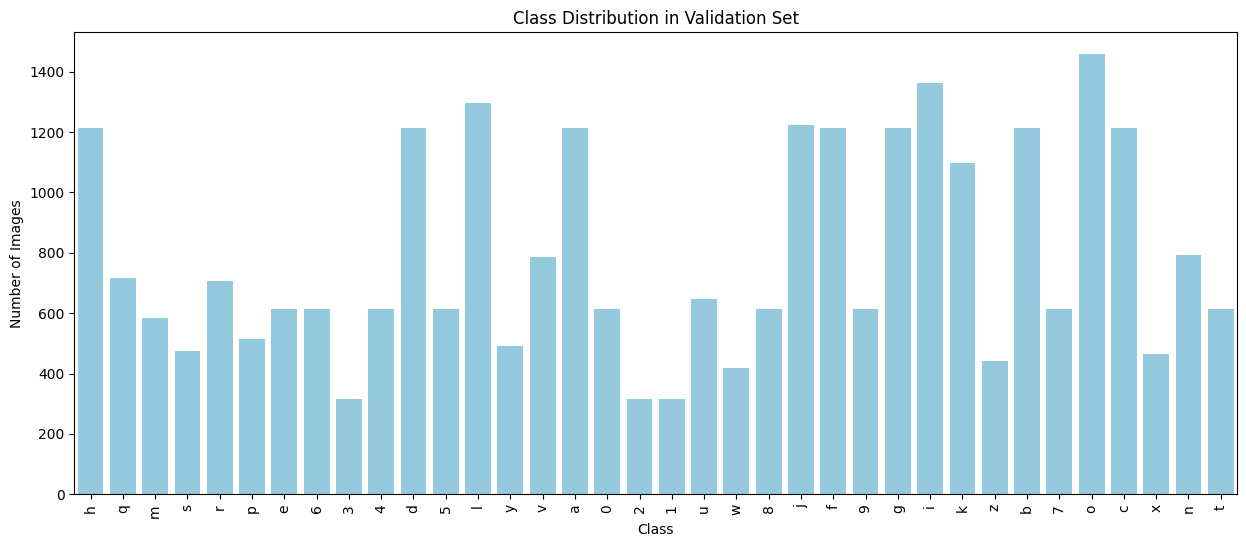

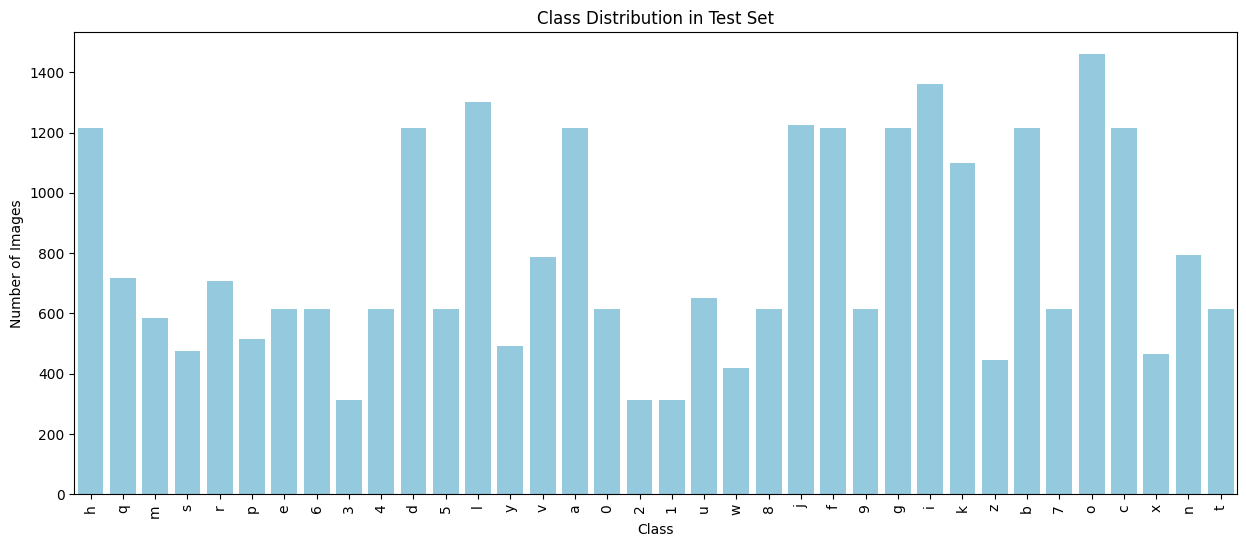

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(dataset_counts, title):
    """Plots the class distribution for a single dataset."""

    class_names = list(dataset_counts.keys())
    class_values = list(dataset_counts.values())

    plt.figure(figsize=(15, 6))
    sns.barplot(x=class_names, y=class_values, color='skyblue')

    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.show()

# Plot for each dataset split
plot_class_distribution(train_counts, 'Class Distribution in Training Set')
plot_class_distribution(val_counts, 'Class Distribution in Validation Set')
plot_class_distribution(test_counts, 'Class Distribution in Test Set')

# **Model Creating and Testing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Base model with pre-trained weights
base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(36, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<ipython-input-12-1415c1408d1d>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = np.array(train_generator.classes)
class_indices = np.unique(classes)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_indices,
    y=classes
)

# Convert to dictionary
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3
        )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 222s 79ms/step - accuracy: 0.6632 - loss: 1.1617 - val_accuracy: 0.8967 - val_loss: 0.3095 - learning_rate: 0.0010
Epoch 2/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 254s 77ms/step - accuracy: 0.8379 - loss: 0.4916 - val_accuracy: 0.9193 - val_loss: 0.2352 - learning_rate: 0.0010
Epoch 3/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 256s 75ms/step - accuracy: 0.8549 - loss: 0.4318 - val_accuracy: 0.9250 - val_loss: 0.2158 - learning_rate: 0.0010
Epoch 4/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 201s 75ms/step - accuracy: 0.8678 - loss: 0.3953 - val_accuracy: 0.9238 - val_loss: 0.2138 - learning_rate: 0.0010
Epoch 5/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 198s 74ms/step - accuracy: 0.8738 - loss: 0.3773 - val_accuracy: 0.9311 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 6/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 194s 73ms/step - accuracy: 0.8788 - loss: 0.3617 - val_accuracy: 0.9397 - val_loss: 0.1681 - learning_rate: 0.0010
Epoch 7/20
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 198s 74ms/step -

In [ ]:
# After initial training, unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3
        )
    ]
)

Epoch 1/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 222s 78ms/step - accuracy: 0.6987 - loss: 1.7817 - val_accuracy: 0.9337 - val_loss: 0.1939 - learning_rate: 1.0000e-04
Epoch 2/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 199s 75ms/step - accuracy: 0.8688 - loss: 0.4051 - val_accuracy: 0.9539 - val_loss: 0.1366 - learning_rate: 1.0000e-04
Epoch 3/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 198s 74ms/step - accuracy: 0.9160 - loss: 0.2494 - val_accuracy: 0.9732 - val_loss: 0.0862 - learning_rate: 1.0000e-04
Epoch 4/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 196s 73ms/step - accuracy: 0.9344 - loss: 0.1988 - val_accuracy: 0.9715 - val_loss: 0.0731 - learning_rate: 1.0000e-04
Epoch 5/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 195s 73ms/step - accuracy: 0.9497 - loss: 0.1535 - val_accuracy: 0.9845 - val_loss: 0.0469 - learning_rate: 1.0000e-04
Epoch 6/10
2668/2668 ━━━━━━━━━━━━━━━━━━━━ 199s 74ms/step - accuracy: 0.9590 - loss: 0.1288 - val_accuracy: 0.9870 - val_loss: 0.0383 - learning_rate: 1.0000e-04
Epoch 7/10
2668/2668 ━━━━━━━━━━━━━

# **Model Evalutation**

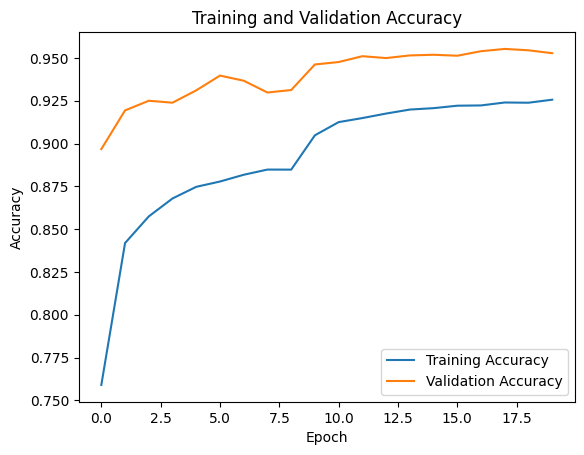

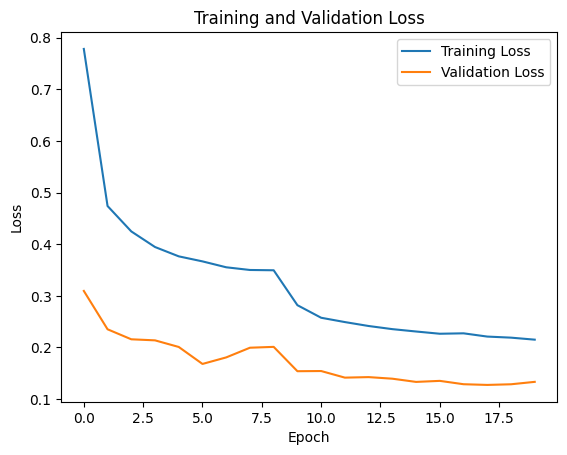

In [ ]:
# Good Training and Validation = YAY

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

890/890 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step
TP: 28231
FP: 239
TN: 996211
FN: 239
F1 Score: 0.9908


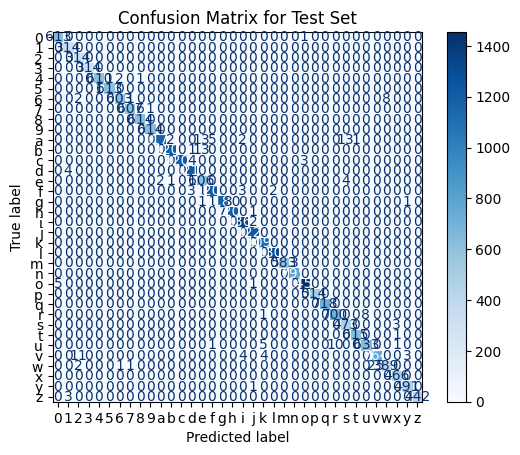

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Get predictions for the test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# precision and recall (can detect false positive)
f1 = f1_score(y_true, y_pred, average='macro')

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')

# Print metrics
print(f"TP: {TP.sum()}")
print(f"FP: {FP.sum()}")
print(f"TN: {TN.sum()}")
print(f"FN: {FN.sum()}")
print(f"F1 Score: {f1:.4f}")

plt.show()

# **Save Model**

In [ ]:
model.save('asl_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/asl_model.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
save_path = '/content/drive/MyDrive/ASL_Model'
os.makedirs(save_path, exist_ok=True)

# Save the model
model_path = os.path.join(save_path, 'asl_model.keras')
model.save(model_path)
print(f"Model saved to: {model_path}")

Mounted at /content/drive
Model saved to: /content/drive/MyDrive/ASL_Model/asl_model.keras
